In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load Data
df = pd.read_csv('AQI_masterdata.csv')

In [ ]:
# Step 2: Descriptive Analysis
print(df.describe())

                date  number_of_monitoring_stations  aqi_value(in Indices)
count  379305.000000                  379164.000000          379305.000000
mean    44549.343019                       1.813316             120.244948
std       807.352534                       3.138854              81.830929
min     42125.000000                       1.000000               3.000000
25%     43991.000000                       1.000000              60.000000
50%     44721.000000                       1.000000              96.000000
75%     45226.000000                       1.000000             156.000000
max     45627.000000                      40.000000             500.000000


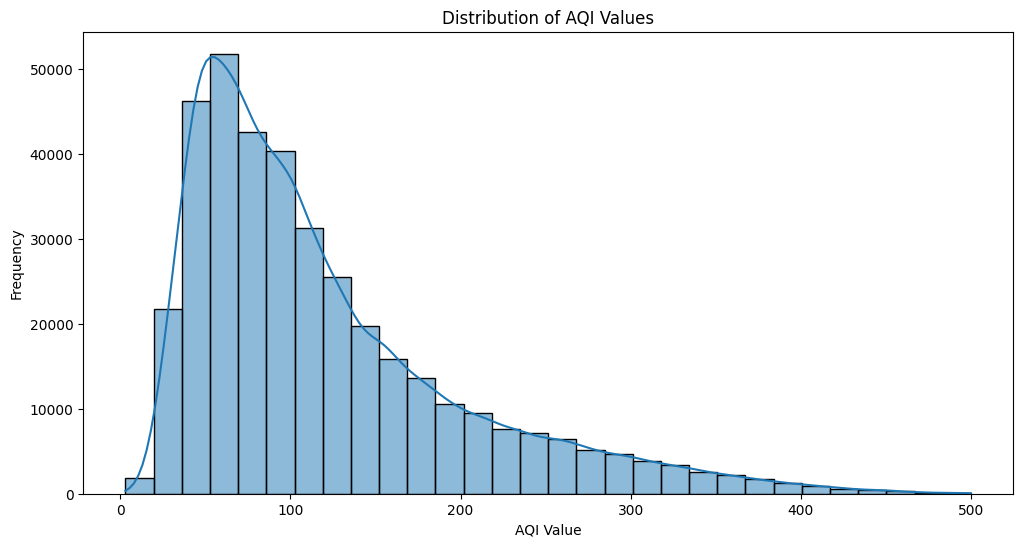

In [ ]:
# Histograms of AQI values
plt.figure(figsize=(12, 6))
sns.histplot(df['aqi_value(in Indices)'], bins=30, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

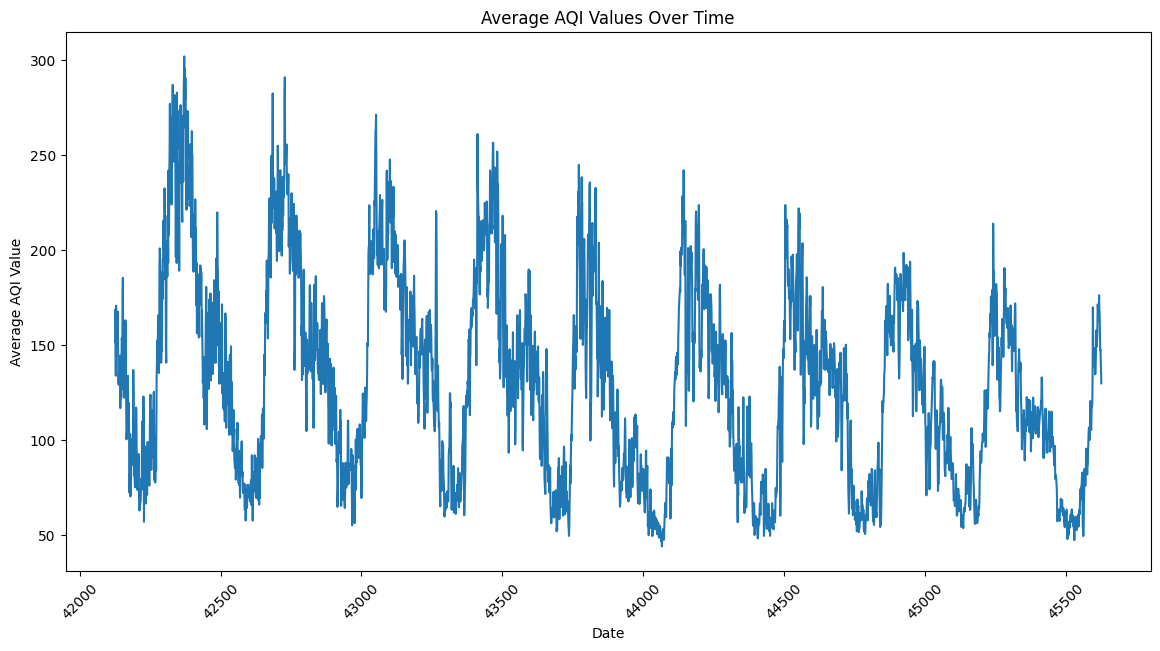

In [ ]:
# Step 3: Time Series Analysis
plt.figure(figsize=(14, 7))
df_grouped = df.groupby('date')['aqi_value(in Indices)'].mean().reset_index()
plt.plot(df_grouped['date'], df_grouped['aqi_value(in Indices)'])
plt.title('Average AQI Values Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.show()

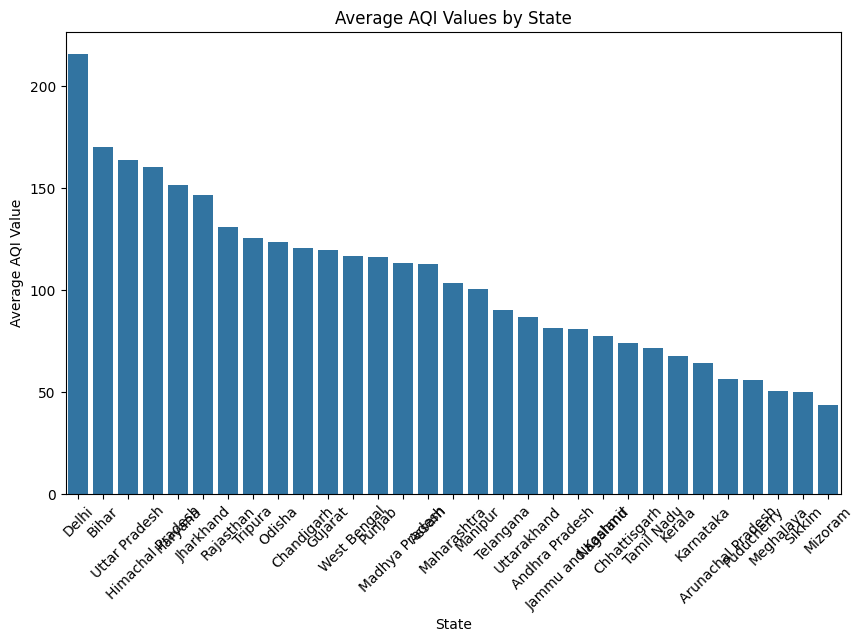

In [ ]:
# Step 4: Comparative Analysis
state_aqi = df.groupby('state')['aqi_value(in Indices)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='aqi_value(in Indices)', data=state_aqi.sort_values('aqi_value(in Indices)', ascending=False))
plt.title('Average AQI Values by State')
plt.xlabel('State')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.show()

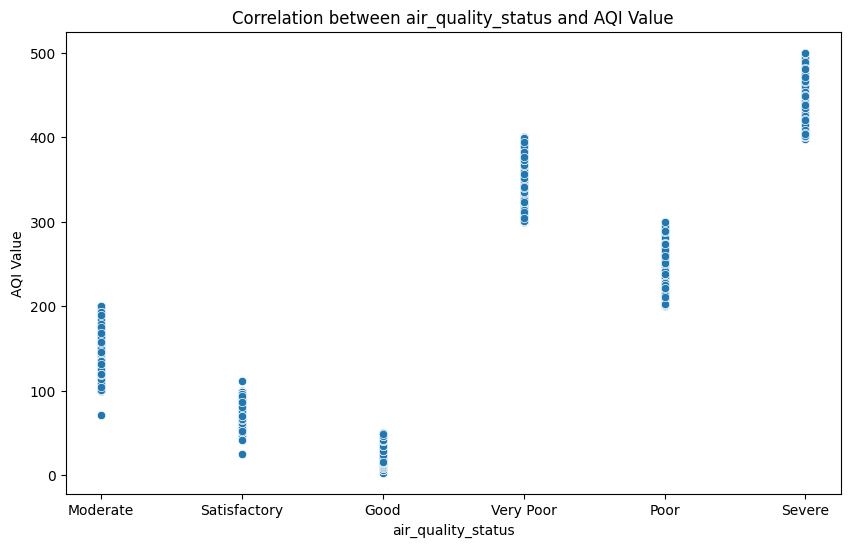

In [ ]:
# Step 5: Correlation Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='air_quality_status', y='aqi_value(in Indices)', data=df)
plt.title('Correlation between air_quality_status and AQI Value')
plt.xlabel('air_quality_status')
plt.ylabel('AQI Value')
plt.show()

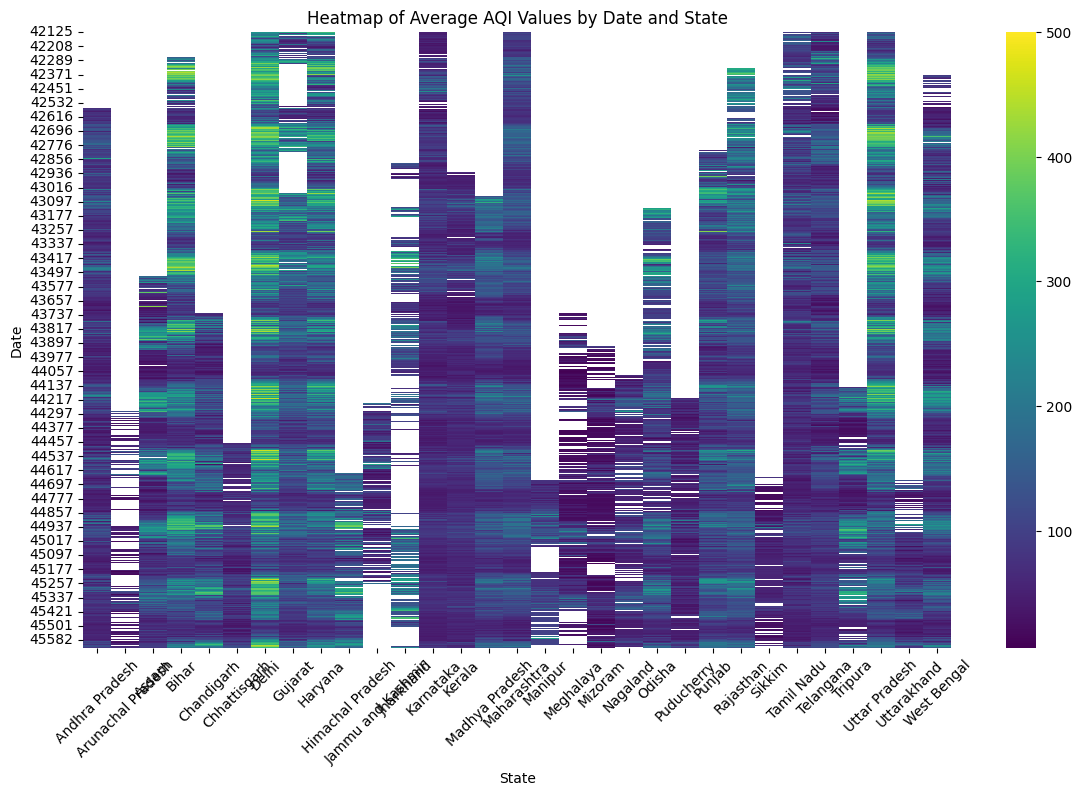

In [ ]:
# Step: Heatmap
pivot_df = df.pivot_table(values='aqi_value(in Indices)', index='date', columns='state', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='viridis', annot=False, cbar=True)
plt.title('Heatmap of Average AQI Values by Date and State')
plt.xlabel('State')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

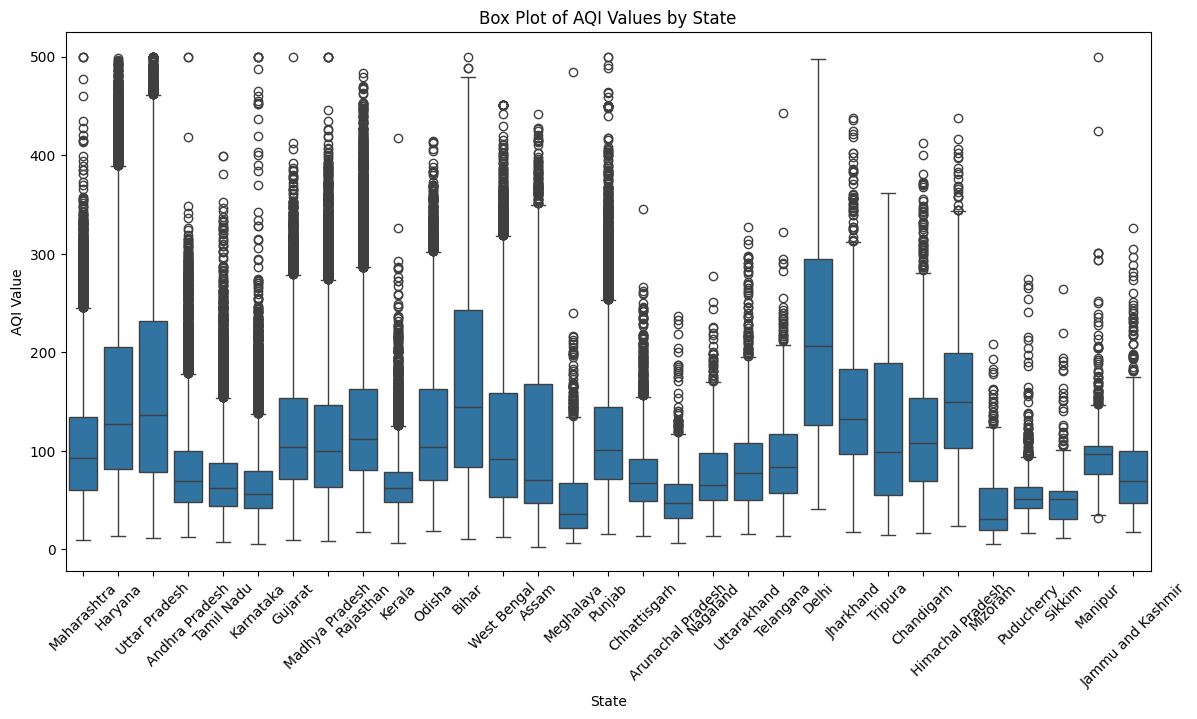

In [ ]:
# Step: Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='state', y='aqi_value(in Indices)', data=df)
plt.title('Box Plot of AQI Values by State')
plt.xlabel('State')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()

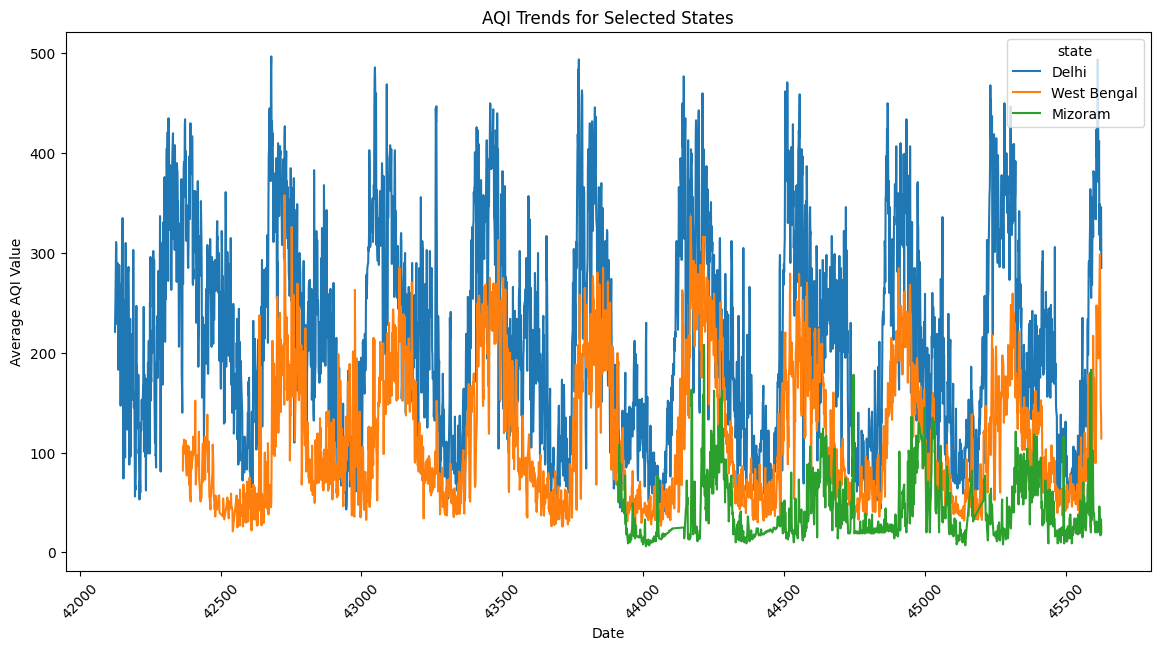

In [ ]:
# Step: Line Plot for Specific States
selected_states = df[df['state'].isin(['Delhi', 'Mizoram', 'West Bengal'])]
avg_state_aqi = selected_states.groupby(['date', 'state'])['aqi_value(in Indices)'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='aqi_value(in Indices)', hue='state', data=avg_state_aqi)
plt.title('AQI Trends for Selected States')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.show()

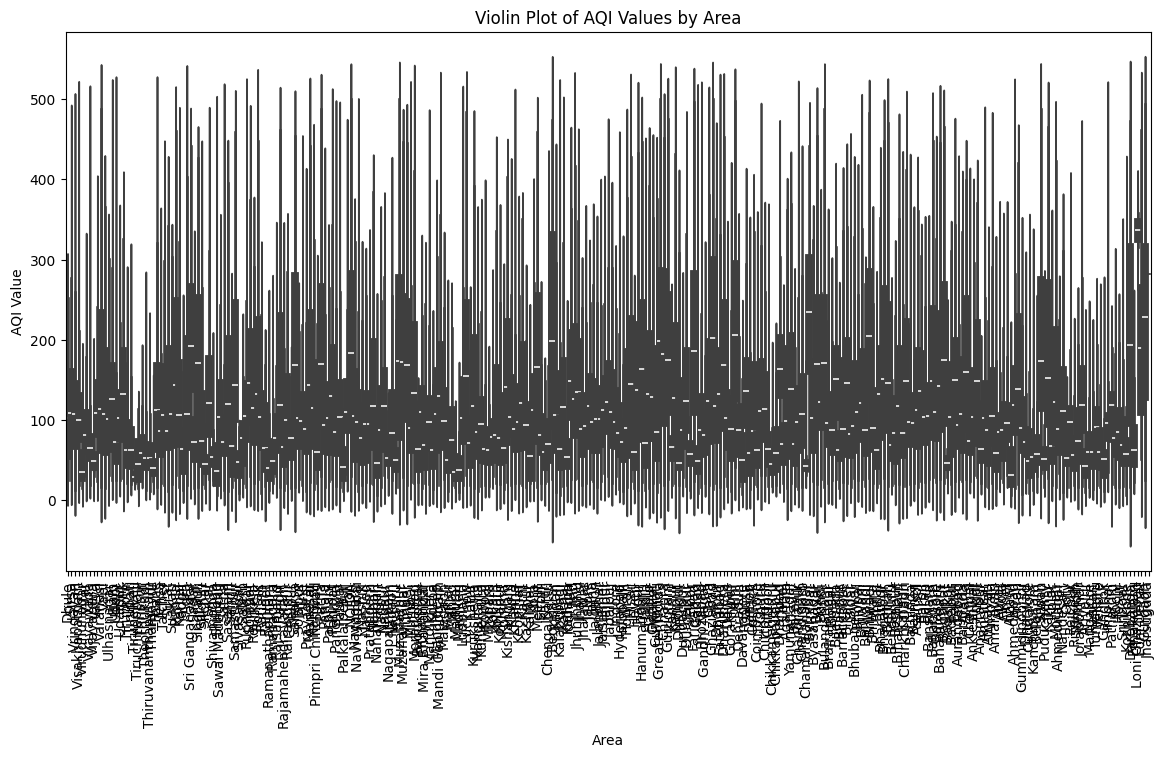

In [ ]:
# Step: Violin Plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='area', y='aqi_value(in Indices)', data=df)
plt.title('Violin Plot of AQI Values by Area')
plt.xlabel('Area')
plt.ylabel('AQI Value')
plt.xticks(rotation=90)
plt.show()

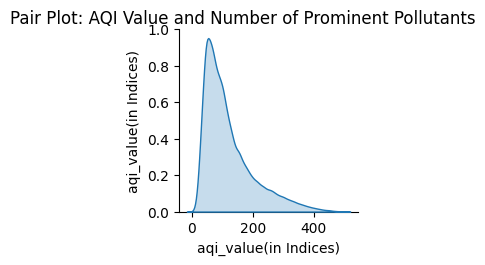

In [ ]:
# Step: Pair Plo
sns.pairplot(df[['aqi_value(in Indices)', 'prominent_pollutants']], diag_kind='kde')
plt.suptitle('Pair Plot: AQI Value and Number of Prominent Pollutants', y=1.02)
plt.show()

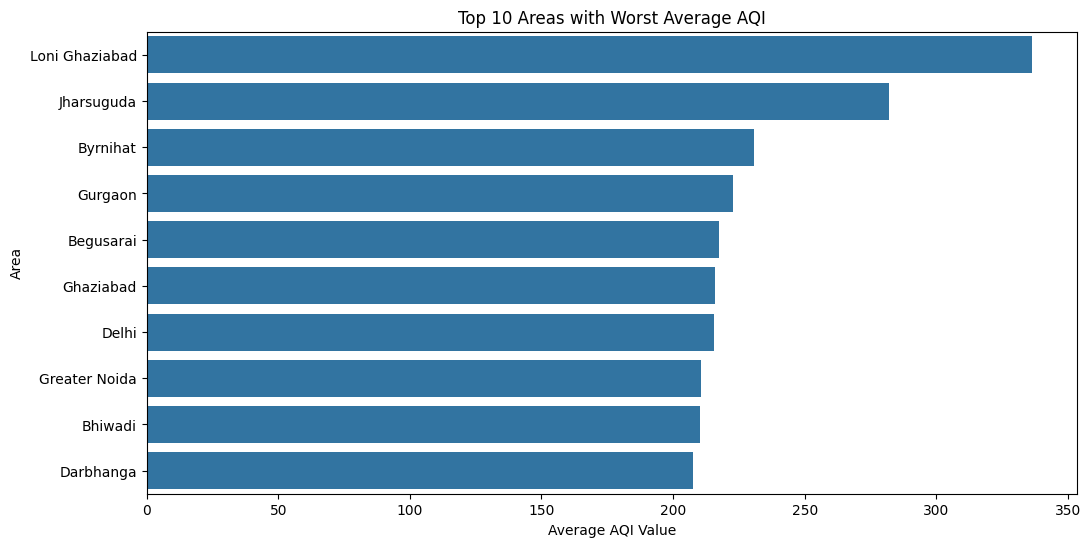

In [ ]:
# Step: Top Areas with Worst Air Quality
top_areas_aqi = df.groupby('area')['aqi_value(in Indices)'].mean().reset_index()
top_areas_aqi = top_areas_aqi.sort_values(by='aqi_value(in Indices)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='aqi_value(in Indices)', y='area', data=top_areas_aqi)
plt.title('Top 10 Areas with Worst Average AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('Area')
plt.show()

<ipython-input-32-7b9fae28bd4f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aqi_value(in Indices)', y='area', data=top_areas_aqi_best, palette='Greens')


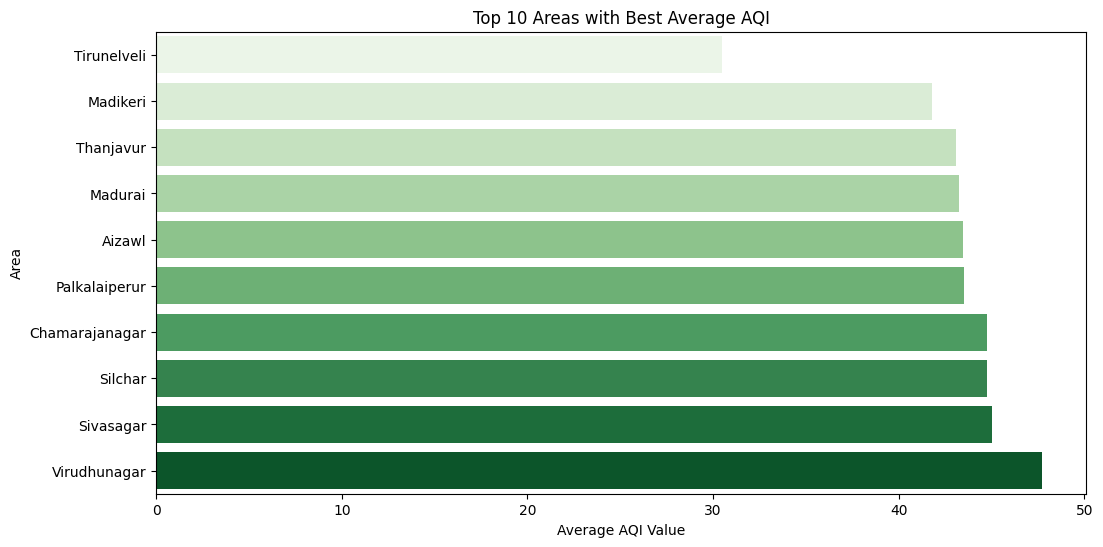

In [ ]:
# Step: Top Areas with Best Air Quality
top_areas_aqi_best = df.groupby('area')['aqi_value(in Indices)'].mean().reset_index()

# Sort in ascending order to get the best AQI values
top_areas_aqi_best = top_areas_aqi_best.sort_values(by='aqi_value(in Indices)', ascending=True).head(10)

# Plotting Top Areas with Best Air Quality
plt.figure(figsize=(12, 6))
sns.barplot(x='aqi_value(in Indices)', y='area', data=top_areas_aqi_best, palette='Greens')

plt.title('Top 10 Areas with Best Average AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('Area')
plt.show()

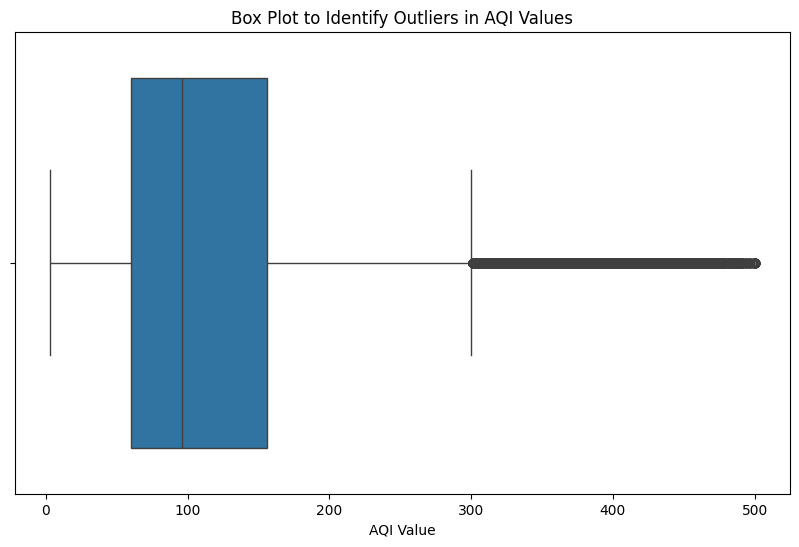

Outliers in AQI Values:
         date          state         area  aqi_value(in Indices)
1399    45622    West Bengal     Durgapur                    392
1404    45622    West Bengal  Barrackpore                    366
1820    45620          Bihar      Katihar                    380
2043    45619  Uttar Pradesh        Hapur                    375
2148    45619        Haryana      Panipat                    377
...       ...            ...          ...                    ...
377683  42275    Maharashtra   Chandrapur                    420
377831  42263  Uttar Pradesh         Agra                    404
379236  42131        Haryana    Faridabad                    482
379252  42130        Haryana    Faridabad                    481
379259  42129        Haryana    Faridabad                    438

[5754 rows x 4 columns]


In [ ]:
from scipy import stats

# Step: Outlier Detection
df['z_score'] = stats.zscore(df['aqi_value(in Indices)'])
outliers = df[df['z_score'].abs() > 3]  # Z-score threshold

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['aqi_value(in Indices)'])
plt.title('Box Plot to Identify Outliers in AQI Values')
plt.xlabel('AQI Value')
plt.show()

print("Outliers in AQI Values:")
print(outliers[['date', 'state', 'area', 'aqi_value(in Indices)']])

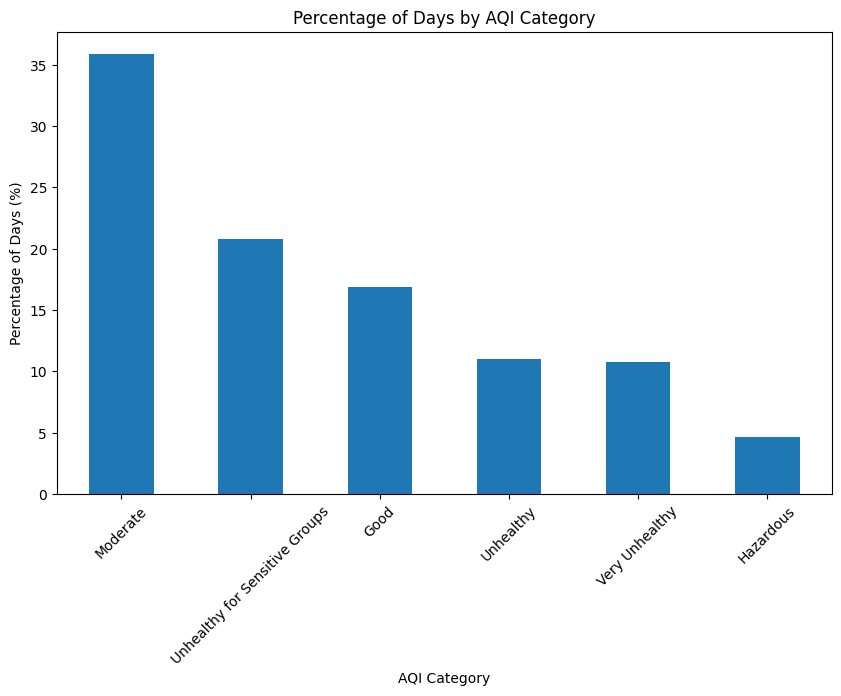

AQI_Category
Moderate                          35.884315
Unhealthy for Sensitive Groups    20.794348
Good                              16.861629
Unhealthy                         11.013564
Very Unhealthy                    10.771806
Hazardous                          4.674339
Name: proportion, dtype: float64


In [ ]:
# Step: Percentage of Days with Unhealthy AQI
conditions = [
    (df['aqi_value(in Indices)'] <= 50),   # Good
    (df['aqi_value(in Indices)'] <= 100),  # Moderate
    (df['aqi_value(in Indices)'] <= 150),  # Unhealthy for Sensitive Groups
    (df['aqi_value(in Indices)'] <= 200),  # Unhealthy
    (df['aqi_value(in Indices)'] <= 300),  # Very Unhealthy
    (df['aqi_value(in Indices)'] > 300)     # Hazardous
]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI_Category'] = pd.cut(df['aqi_value(in Indices)'], bins=[-1, 50, 100, 150, 200, 300, float('inf')], labels=labels)

percentage_days = df['AQI_Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
percentage_days.plot(kind='bar')
plt.title('Percentage of Days by AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('Percentage of Days (%)')
plt.xticks(rotation=45)
plt.show()

print(percentage_days)

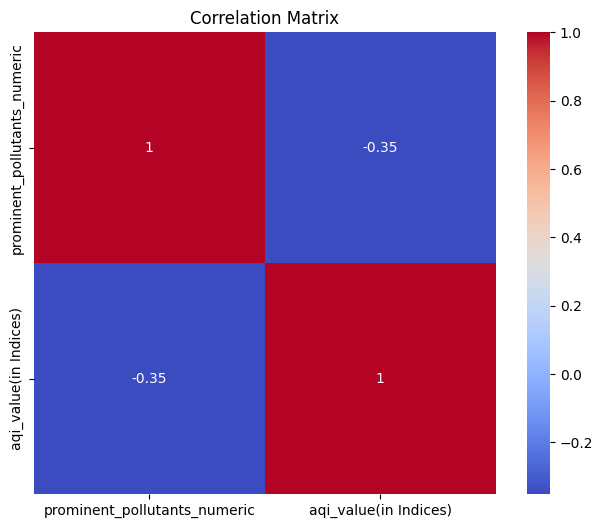

In [ ]:
# Step: Correlation Matrix
# Convert 'prominent_pollutants' to numeric if it contains categories represented as strings
# For example, if pollutants are categorized as 'PM2.5', 'PM10', etc., you might need to assign numerical values to them.

# Assuming 'prominent_pollutants' contains string categories, create a mapping to numeric values
pollutant_mapping = {
    'PM2.5': 1,
    'PM10': 2,
    'NO2': 3,
    'SO2': 4,
    'CO': 5,
    'O3': 6,  #add more as needed
}

# Apply the mapping to the 'prominent_pollutants' column to convert it to numeric
df['prominent_pollutants_numeric'] = df['prominent_pollutants'].map(pollutant_mapping)

# Now calculate the correlation using the numeric column
correlation = df[['prominent_pollutants_numeric', 'aqi_value(in Indices)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-28-b4c82bec65cc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aqi_value(in Indices)', y='state', data=worst_states, palette='Reds')


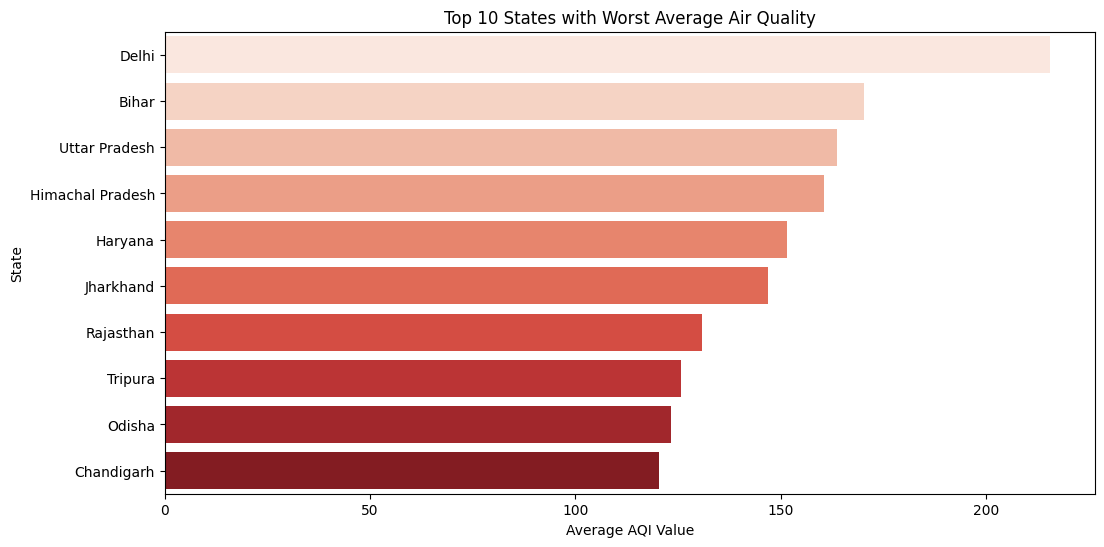

In [ ]:
# Step 1: Calculate Average AQI by State
avg_aqi_by_state = df.groupby('state')['aqi_value(in Indices)'].mean().reset_index()
# Step 2: Get Top States with Worst Air Quality
worst_states = avg_aqi_by_state.sort_values(by='aqi_value(in Indices)', ascending=False).head(10)
# Plotting Top Worst States
plt.figure(figsize=(12, 6))
sns.barplot(x='aqi_value(in Indices)', y='state', data=worst_states, palette='Reds')
plt.title('Top 10 States with Worst Average Air Quality')
plt.xlabel('Average AQI Value')
plt.ylabel('State')
plt.show()

<ipython-input-29-1fd18392b3bf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aqi_value(in Indices)', y='state', data=best_states, palette='Greens')


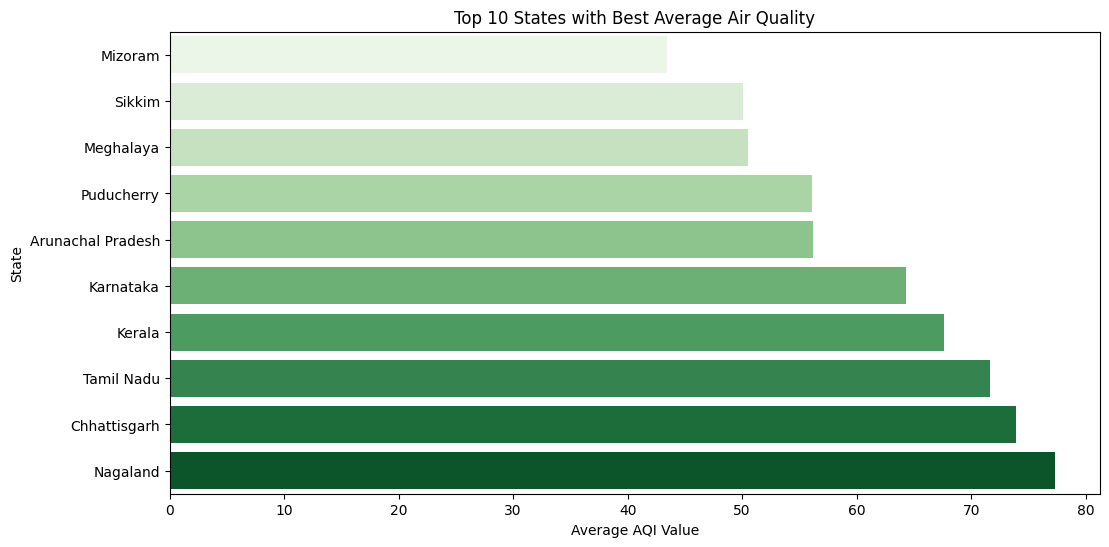

In [ ]:
# Step 3: Get Top States with Best Air Quality
best_states = avg_aqi_by_state.sort_values(by='aqi_value(in Indices)', ascending=True).head(10)
# Plotting Top Best States
plt.figure(figsize=(12, 6))
sns.barplot(x='aqi_value(in Indices)', y='state', data=best_states, palette='Greens')
plt.title('Top 10 States with Best Average Air Quality')
plt.xlabel('Average AQI Value')
plt.ylabel('State')
plt.show()

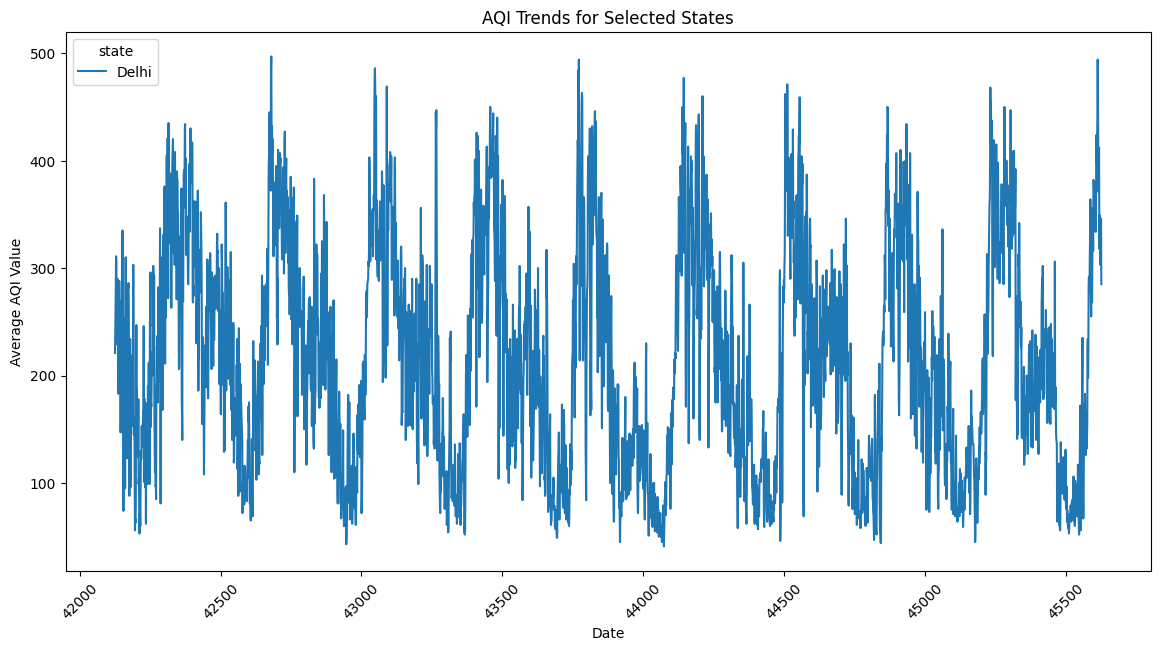

In [ ]:
# Step: Line Plot for Specific States
selected_states = df[df['state'].isin(['Delhi'])]
avg_state_aqi = selected_states.groupby(['date', 'state'])['aqi_value(in Indices)'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='aqi_value(in Indices)', hue='state', data=avg_state_aqi)
plt.title('AQI Trends for Selected States')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.show()